In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# Load local modules
import sys
sys.path.append('c:\\Users\\C1007555\\Documents\\GitHub\\seisinv\\src')
from basic_ops_seis_inv import Filtering, ConversionTool

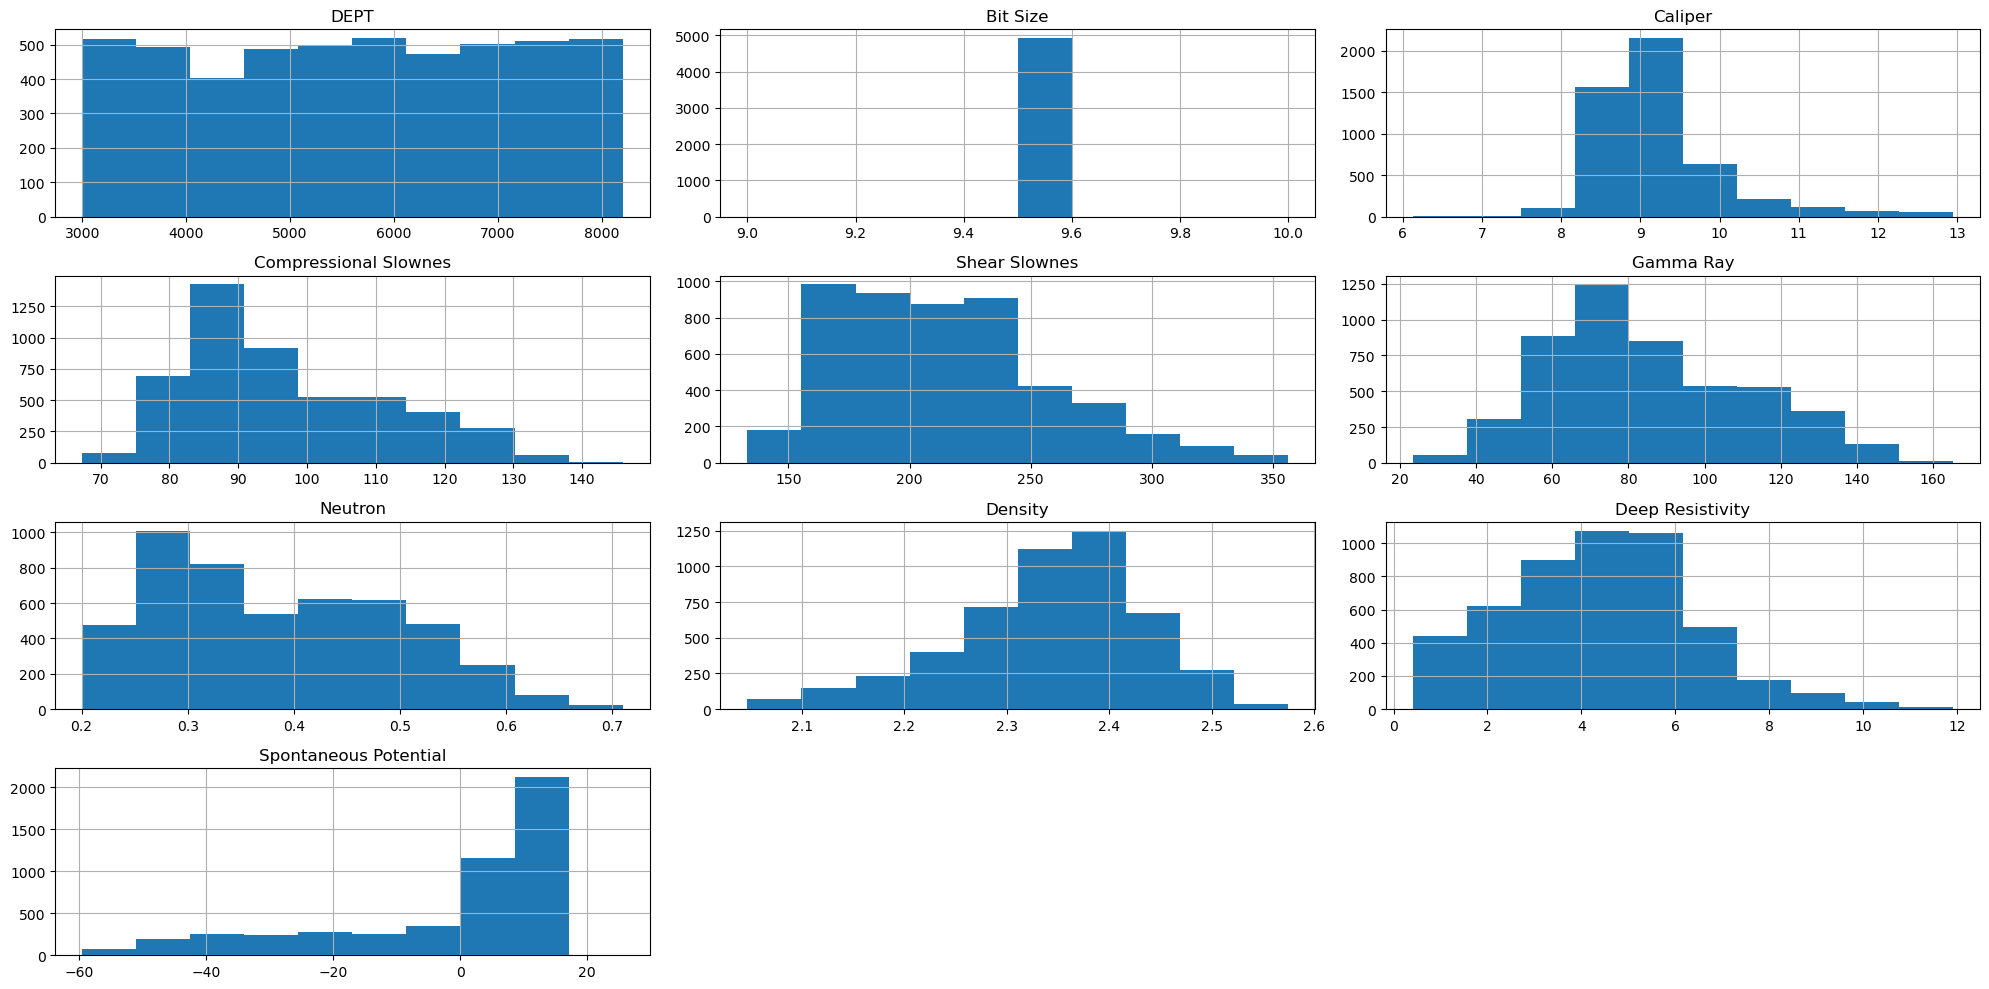

In [11]:
# Load data
path_data = 'c:\\Users\\C1007555\\Documents\\GitHub\\seisinv\\data\\Task2_data.xlsx'
df = pd.read_excel(path_data)
# Remove outliers
df = Filtering().remove_outliers(df, drop_col=['Surface', 'Bit Size'])
# Plot data
df.hist(figsize=(20,10))
plt.tight_layout()

In [13]:
# Backus conversion to seismic domain
vp = 1 / ConversionTool().SI_conversion(df['Compressional Slownes'], 'micros/ft')
vs = 1 / ConversionTool().SI_conversion(df['Shear Slownes'], 'micros/ft')
rho = ConversionTool().SI_conversion(df['Density'], 'g/cm3')
depth = df['DEPT']
vp0, vs0, rho0, dept0 = ConversionTool(104, vp, vs, rho, 3000, depth).backus_downsampling()

Output units: kg/m3
Original sampling frequency (in well-log domain) is: 14853.21312132847 Hz
New sampling frequency (in seismic domain) is: 119.49768920340404 Hz


Text(0.5, 1.0, 'Backus conversion: From Well-log domain to Seismic domain')

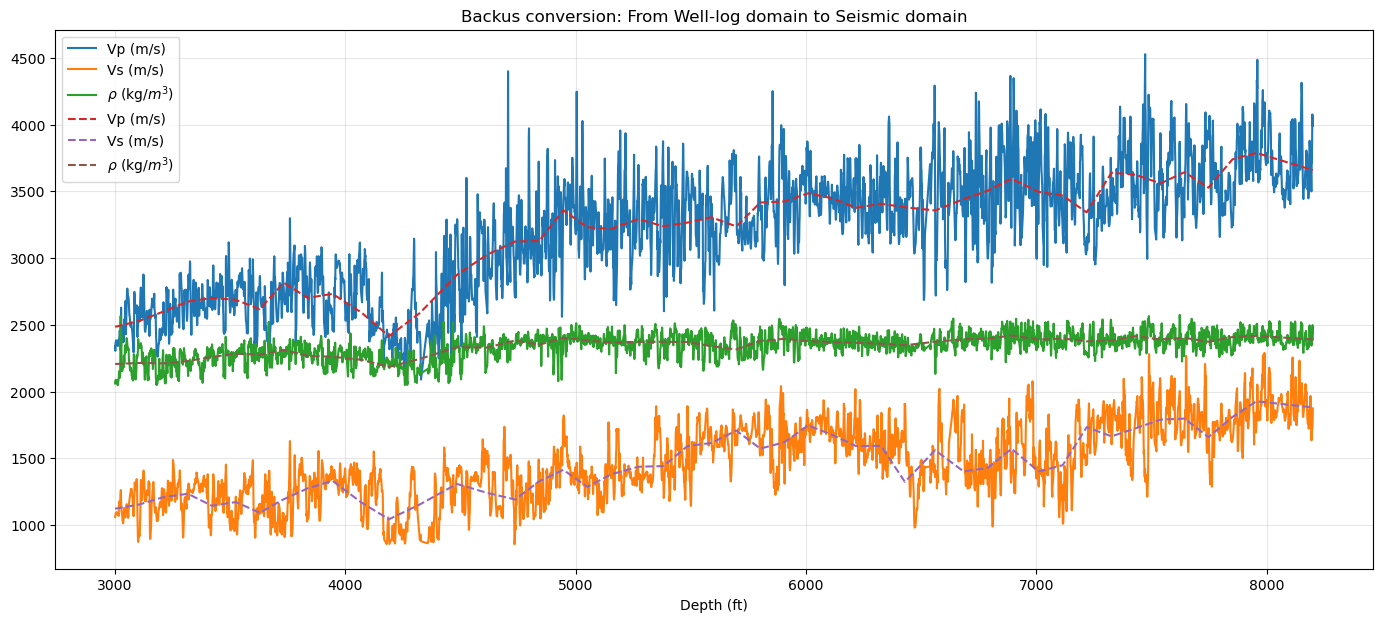

In [14]:
# Plot resmapled data
fig = plt.figure(figsize=(17,7))
plt.plot(df.DEPT, vp, label='Vp (m/s)')
plt.plot(df.DEPT, vs, label='Vs (m/s)')
plt.plot(df.DEPT, rho, label=fr'$\rho$ (kg/$m^3$)')
plt.plot(dept0, vp0, label='Vp (m/s)', linestyle='dashed')
plt.plot(dept0, vs0, label='Vs (m/s)', linestyle='dashed')
plt.plot(dept0, rho0, label=fr'$\rho$ (kg/$m^3$)', linestyle='dashed')
plt.xlabel('Depth (ft)')
plt.grid(alpha=.3)
plt.legend(ncol=1)
plt.title('Backus conversion: From Well-log domain to Seismic domain')

# Seismic Genetic Inversion

In [16]:
print(f'There are {len(vp0)} samples in the new seismic domain.')

There are 47 samples in the new seismic domain.


We will create 10000 random models with some random constrained values for $v_p$, $v_s$ and $\rho$. As there are 47 samples, we will create 47 gens, that will form a chromosome.

In [104]:
chromosome_shape = (47, 10000)
rho_gen = np.random.uniform(1.5, 2.8, chromosome_shape)
vs_gen = np.random.uniform(1.0, 1.9, chromosome_shape)
vp_gen = np.random.uniform(1.9, 6, chromosome_shape)

array([[1.76760439, 2.24665091, 1.6333201 , ..., 2.49575529, 2.47266077,
        2.3720169 ],
       [2.45876562, 2.64313144, 2.74985819, ..., 1.94894154, 1.53174248,
        2.14163915],
       [2.38301669, 2.61282497, 2.24982466, ..., 2.5294175 , 1.76975364,
        2.11570919],
       ...,
       [2.066385  , 1.79062444, 2.47027031, ..., 1.97335579, 2.52480489,
        2.1774027 ],
       [2.28489008, 1.90535055, 2.55358132, ..., 2.43695272, 1.69878119,
        2.60287211],
       [2.10843205, 2.30755568, 1.91047533, ..., 1.96663944, 2.62229016,
        2.26157378]])

In [111]:
n_chromosome = 0
rho_chromosome = rho_gen[:,n_chromosome]
vp_chromosome = vp_gen[:,n_chromosome]
vs_chromosome = vs_gen[:,n_chromosome]


In [103]:
vs0.max()

1926.8805821401759

In [102]:
df

,DEPT,Bit Size,Caliper,Compressional Slownes,Shear Slownes,Gamma Ray,Neutron,Density,Deep Resistivity,Spontaneous Potential,Surface
0,3000,9.5,9.07805,130.18320,287.5545,23.30912,0.56499,2.06083,0.44333,-45.88697,Top_1
1,3001,9.5,9.11115,132.22950,284.9733,27.90894,0.47970,2.07622,0.46744,-46.03849,Top_1
2,3002,9.5,9.12215,128.80150,282.1579,27.11216,0.48192,2.08354,0.48176,-46.62711,Top_1
3,3003,9.5,9.12217,128.46430,279.9890,25.41507,0.53129,2.08723,0.48818,-47.52837,Top_1
4,3004,9.5,9.05605,127.94190,278.7398,30.71320,0.47623,2.06726,0.49740,-47.99183,Top_1
...,...,...,...,...,...,...,...,...,...,...,...
4916,8196,9.5,8.74737,82.19551,179.6912,53.67944,0.22237,2.46533,5.03951,3.34816,Top_5
4917,8197,9.5,8.74731,77.29253,177.9962,59.17858,0.22924,2.44470,6.33363,7.78983,Top_5
4918,8198,9.5,8.70311,74.77816,176.1770,66.17214,0.26280,2.43656,7.77693,9.60661,Top_5
4919,8199,9.5,8.65917,75.38631,170.7982,67.56411,0.28504,2.49777,9.01924,9.85767,Top_5
